# Bursting The Bubble
COMP-4447: Data Science Tools 1

Final Project

Sammantha Firestone, Jacquelyn Noyes

## Purpose
Currently in the United States, one of the largest economic barriers that exists is the unaffordability of housing. Historically, the average cost of a single-family home was around five times more than that of the average yearly household income; however, in recent years, that ratio has increased to the average house costing over seven times more than the average household income.
The motivation of this analysis was to further understand the disproportionate increase of housing prices compared to household incomes. To accomplish this, we pulled from multiple data sources to construct a set that fit our needs. 

## Methodology
The data for median household income was collected from the US Census. The data is organized based on median income per year, from 1984 to 2021, for each state in the United States. There is also a row that shows the median income throughout the years for the entire country. 

The data for the average price of a house was collected from Zillow. One dataset listed the median price of a house based on year and region of the United States. The other dataset contained an algorithm for predicting price increases and/or decreases based on previous trends. 

For this analysis, we will clean and combine the data taken from the above datasets to create a singular data frame that includes median household income and average house price based on year and state. We will then work to visualize the growing gap between household wages and housing market prices. 


## WIP - improvements
Use this section only if the notebook is not final.

Notable TODOs:
- Look at all preliminary graphs side by side
- Merge the household income and housing prices data to get that income/price data
- Zoom in on 2008 bubble burst data to compare to today
- All stats on those two time periods and compare
- Geopandas map on ratio between 2008 vs today
- Fill in results and comment on analysis steps
- Create presentation

## Results
Describe and comment the most important results.

## Suggested next steps
State suggested next steps, based on results obtained in this notebook.

# Setup

## Library import
We import all the required Python libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np
import re

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Visualizations
import plotly
import plotly.graph_objs as go
import plotly.offline as ply
plotly.offline.init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="dark")
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable

# Autoreload extension
%load_ext autoreload    
%autoreload 1
%matplotlib inline

# Parameter definition
We set all relevant parameters for our notebook. By convention, parameters are uppercase, while all the 
other variables follow Python's guidelines.


# Data import
We retrieve all the required data for the analysis.

In [2]:
# Zillow house price data
housing_prices = pd.read_csv('Metro_Data_Legacy.csv')
# US Census household income data
household_income = pd.read_csv("Household_Income.csv")
# State geometry
states = gpd.read_file('us-states.json')

# Data processing
Put here the core of the notebook. Feel free di further split this section into subsections.

# Zillow House Price Data Cleaning

In [3]:
housing_prices.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,...,2020-09-30,2020-10-31,2020-11-30,2020-12-31,2021-01-31,2021-02-28,2021-03-31,2021-04-30,2021-05-31,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,102001,0,United States,country,NaN,109323.629012,109154.034652,109213.959881,109422.056145,109671.155085,109887.843632,110068.483445,110366.697509,110563.090434,110809.036228,111041.501539,111273.330243,111510.396209,111709.574221,111989.675489,112269.749123,112786.522619,113110.336755,113472.262909,113765.931207,...,266014.777030,268979.655586,271958.506364,274732.871252,278455.506508,282299.998335,286646.643697,291580.834981,298161.087837,304575.359865,309684.736852,313846.798683,317258.570109,320649.955305,324251.151551,329433.472878,334293.345957,340125.707301,346203.327354,352717.394829,356945.667516,359718.579670,359350.224752,358215.302365,358282.930208
1,394913,1,"New York, NY",msa,NY,188630.801041,186913.221718,186527.685745,186211.464806,186103.395161,185546.442155,185567.972956,185695.719933,185643.100956,185819.794411,186393.813807,186655.031297,187392.334023,187862.568958,188299.863700,188769.910842,189418.134139,190167.396057,190803.488945,191320.934901,...,501981.287520,507753.889760,512462.829075,517593.860047,521014.155383,526270.856330,531688.635288,537847.008734,546318.701485,555910.556147,562717.240048,568075.112046,571690.304194,573343.845881,575596.644214,578138.406356,583150.964369,588772.302789,598951.858207,607927.900018,615720.125097,619986.876586,621573.137884,620501.194989,619774.445218
2,753899,2,"Los Angeles, CA",msa,CA,187073.406162,186404.133695,186112.156345,186088.465059,185957.334353,185826.959019,185631.785133,185706.527643,185470.142802,185183.724776,185074.294636,184787.105387,185872.367111,184102.707276,185016.474116,185573.517040,185635.848784,186624.772809,187090.355523,188304.003362,...,720660.826760,733733.560628,736162.300246,742389.728613,751482.057908,762654.117395,769489.316837,788701.732721,812264.215867,830088.897090,843952.385234,842894.849566,847713.650513,855862.924263,864290.858471,876723.868168,889963.205427,904246.758327,933355.266190,952799.735114,957843.917793,935600.608825,931697.594288,900374.452615,895380.194948
3,394463,3,"Chicago, IL",msa,IL,146964.023727,146963.247033,146044.835204,147462.728548,147990.841500,148319.055231,148525.130816,148932.655753,149283.243872,149528.906382,149778.027307,149782.831265,149990.473151,150386.300126,150630.660316,150869.149906,152891.246568,152455.746459,152205.709400,146076.915428,...,252221.043010,254519.656631,254888.500729,257039.878429,257780.892412,262574.672432,265266.090121,270040.982254,273842.898195,279102.256411,282917.714816,284981.791684,285531.688307,288158.124974,289560.303518,291249.773498,294058.217797,297901.790214,303296.872553,308010.078892,313226.936837,314276.284782,313372.734249,311777.448413,311695.705112
4,394514,4,"Dallas, TX",msa,TX,113039.806652,112955.588792,113275.209782,113802.713604,114041.578204,114025.652897,114240.486404,114415.699344,114493.519880,115010.692244,115145.813930,115594.000133,115689.673673,115939.120061,115798.984239,116005.232007,116241.967910,116407.678385,116709.598762,116735.211818,...,268908.215148,271844.006123,273983.650724,276999.003782,278615.864509,284479.634904,290238.109131,297985.743573,306560.455956,314498.795413,322134.023599,328170.500837,333077.787602,337459.984040,343668.978892,350430.532764,359104.687712,369655.417004,375712.080035,390853.930211,398753.637650,400391.557757,396049.916286,390557.183060,389153.087426


In [4]:
# Dropping unwanted rows
housing_prices = housing_prices.drop(['RegionID', 'SizeRank', 'RegionName','RegionType'], axis=1)

# Grouping data by state and finding the average
housing_prices = housing_prices.groupby(['StateName']).mean()
# Re-Order the DF by StateName (gives a cleaner view)
housing_prices = housing_prices.sort_values('StateName')

# Swapping the StateName with the YEAR-MONTH-DATE
housing_prices = housing_prices.swapaxes(axis1=0, axis2=1, copy=True)
# Renaming the Index to the name "Year"
housing_prices.index.rename('Year', inplace=True)
housing_prices.reset_index(inplace=True)
# Converting the string data type to datetime
housing_prices['Year'] = pd.to_datetime(housing_prices['Year'])
# Modifying the YY-MM-DD to just year
housing_prices['Year'] = housing_prices['Year'].dt.year
# Grouping data based on year (find the average)
housing_prices = housing_prices.groupby(['Year']).mean()

housing_prices.head()

StateName,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,122851.082483,91635.085441,64842.133202,97884.914192,170710.305593,141931.695121,157795.835918,120397.807427,96015.947614,76066.055245,247274.320347,88762.306503,110872.975373,81306.790905,91433.455072,77004.571508,75927.259013,75177.824115,150544.168480,115404.433409,93434.331562,86552.792943,95227.381026,80416.224991,NaN,NaN,100965.048854,NaN,93012.006424,89631.506084,118492.611036,NaN,162738.250345,74184.462641,81681.477236,57268.788082,125999.790689,83597.244394,132043.045550,108642.456654,NaN,80381.057773,95283.401169,168791.014859,98856.823506,113682.052898,129488.184812,97608.507342,61442.903865,NaN
1997,126638.193476,91469.002998,67194.061954,101379.454031,160675.988546,150275.340713,158227.036356,121606.737042,98815.579103,80054.145780,233280.429052,90772.676859,129129.023869,82813.503528,98996.751439,79666.697759,79267.803550,77721.413885,156972.933010,118069.603688,95443.869962,93486.630236,99936.656258,82682.036027,NaN,NaN,108053.145697,NaN,97528.710396,93055.813211,120371.704050,NaN,167111.637655,74959.297866,85376.109422,59415.545126,131796.573949,86300.915861,133167.101770,113980.292529,NaN,84430.406372,94690.945273,175850.317331,101399.269340,114913.699825,131726.135946,104823.877051,63277.469229,NaN
1998,133300.929001,92771.422375,70293.157486,105334.663816,173756.573994,162551.283449,164879.485937,125389.490635,103705.466988,84978.281148,226922.494232,92154.964152,128468.758903,85875.549991,101068.965212,83579.941213,84940.253243,90868.527774,173055.137991,121142.836884,95430.022426,100425.491924,107586.045449,86599.403092,NaN,NaN,112305.312451,NaN,101519.230316,97513.813250,123701.898983,162790.839639,170603.967761,76547.698719,89853.791288,63364.950392,135372.692610,92049.463701,137984.150878,122407.980573,NaN,88795.863771,97760.951006,180216.907843,105672.968194,115700.951465,138282.841171,109368.011982,65344.723183,130329.747523
1999,144150.084175,93757.628787,70291.257227,110135.420553,183552.930715,177611.561687,174553.168414,132766.425729,106935.189550,89668.752565,226820.252744,97309.508045,129542.291772,90314.194338,107324.707612,88969.910386,87849.050975,99797.189348,192902.151757,125212.973935,101706.614690,106347.837320,118557.102725,89524.065607,96714.383542,NaN,115806.763834,NaN,101613.675867,106157.674602,130534.368260,163967.400692,172409.528935,79306.753228,93973.721025,65523.788405,139173.032239,95490.672502,147088.983654,126547.164080,NaN,91311.365860,101439.207706,181481.741749,111793.143482,121297.911190,143928.787331,116265.740544,65823.610307,134035.510222
2000,146534.783153,97781.446436,72368.006901,115962.153458,207417.708620,197890.444794,189923.963738,144697.460503,109444.006880,94659.257670,239433.658142,102061.943377,132233.837123,95634.773508,111718.297147,97711.337002,91446.960945,103004.036835,221369.982312,131368.785970,110536.900190,114407.025910,129458.909578,90611.654488,100344.291464,NaN,119492.514590,NaN,99546.672006,118007.994414,142262.536256,167712.885203,179721.126320,84417.650867,98291.704199,68018.953284,146738.391234,99022.341698,161750.341852,121956.136053,NaN,94640.020184,105523.905508,185868.722499,119237.568950,129658.874870,150220.778826,122306.940647,67546.723142,139016.854483


Text(0, 0.5, 'Price')

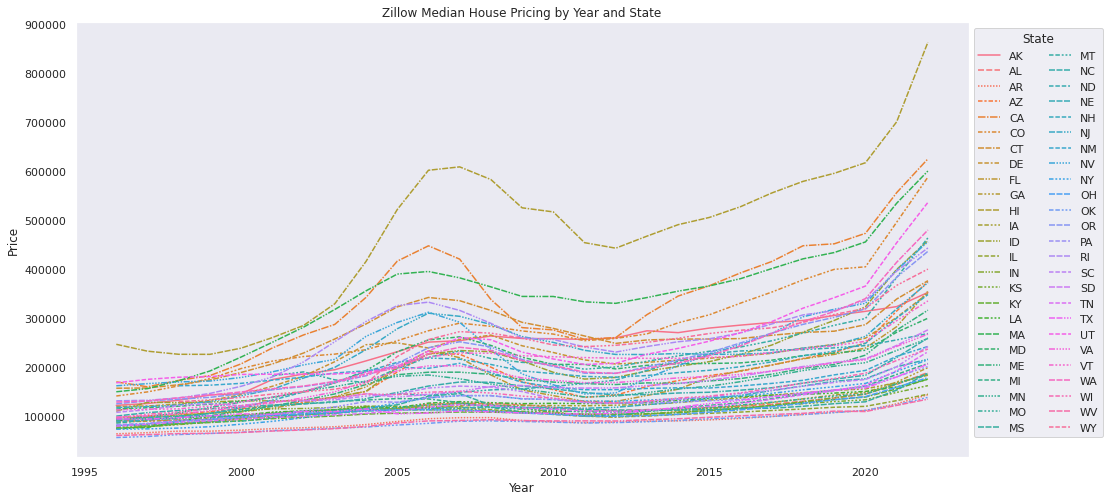

In [5]:
fig, ax = plt.subplots(figsize=(16, 8))
sns.lineplot(data=housing_prices, ax=ax)
ax.legend(title='State', bbox_to_anchor = (1,1), ncol=2)
ax.set_title('Zillow Median House Pricing by Year and State')
ax.set_ylabel('Price')

In [6]:
west = ['WA','OR','CA','ID','NV','MT','WY','UT','AZ','CO','NM']
midwest = ['ND','MN','WI','MI','SD','NE','KS','IA','MO','IL','IN','OH']
south = ['TX','OK','AR','LA','MS','TN','KY','AL','GA','FL','SC','NC','VA','WV','MD','DE']
northeast = ['PA','NJ','NY','CT','MA','RI','VT','NH','ME', 'DC']

region_idx = []

for s in housing_prices.columns:
    if s in west:
        region_idx.append('west')
    elif s in midwest:
        region_idx.append('midwest')
    elif s in south:
        region_idx.append('south')
    elif s in northeast:
        region_idx.append('northeast')
    else:
        region_idx.append('other')


housing_prices.columns = [housing_prices.columns, region_idx]
housing_prices.columns = housing_prices.columns.rename('Region',level=1)

region_prices = housing_prices.groupby(level=1, axis=1).mean()

In [7]:
housing_prices.head()

StateName,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Region,other,south,south,west,west,west,northeast,south,south,south,other,midwest,west,midwest,midwest,midwest,south,south,northeast,south,northeast,midwest,midwest,midwest,south,west,south,midwest,midwest,northeast,northeast,west,west,northeast,midwest,south,west,northeast,northeast,south,midwest,south,south,west,south,northeast,west,midwest,south,west
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,122851.082483,91635.085441,64842.133202,97884.914192,170710.305593,141931.695121,157795.835918,120397.807427,96015.947614,76066.055245,247274.320347,88762.306503,110872.975373,81306.790905,91433.455072,77004.571508,75927.259013,75177.824115,150544.168480,115404.433409,93434.331562,86552.792943,95227.381026,80416.224991,NaN,NaN,100965.048854,NaN,93012.006424,89631.506084,118492.611036,NaN,162738.250345,74184.462641,81681.477236,57268.788082,125999.790689,83597.244394,132043.045550,108642.456654,NaN,80381.057773,95283.401169,168791.014859,98856.823506,113682.052898,129488.184812,97608.507342,61442.903865,NaN
1997,126638.193476,91469.002998,67194.061954,101379.454031,160675.988546,150275.340713,158227.036356,121606.737042,98815.579103,80054.145780,233280.429052,90772.676859,129129.023869,82813.503528,98996.751439,79666.697759,79267.803550,77721.413885,156972.933010,118069.603688,95443.869962,93486.630236,99936.656258,82682.036027,NaN,NaN,108053.145697,NaN,97528.710396,93055.813211,120371.704050,NaN,167111.637655,74959.297866,85376.109422,59415.545126,131796.573949,86300.915861,133167.101770,113980.292529,NaN,84430.406372,94690.945273,175850.317331,101399.269340,114913.699825,131726.135946,104823.877051,63277.469229,NaN
1998,133300.929001,92771.422375,70293.157486,105334.663816,173756.573994,162551.283449,164879.485937,125389.490635,103705.466988,84978.281148,226922.494232,92154.964152,128468.758903,85875.549991,101068.965212,83579.941213,84940.253243,90868.527774,173055.137991,121142.836884,95430.022426,100425.491924,107586.045449,86599.403092,NaN,NaN,112305.312451,NaN,101519.230316,97513.813250,123701.898983,162790.839639,170603.967761,76547.698719,89853.791288,63364.950392,135372.692610,92049.463701,137984.150878,122407.980573,NaN,88795.863771,97760.951006,180216.907843,105672.968194,115700.951465,138282.841171,109368.011982,65344.723183,130329.747523
1999,144150.084175,93757.628787,70291.257227,110135.420553,183552.930715,177611.561687,174553.168414,132766.425729,106935.189550,89668.752565,226820.252744,97309.508045,129542.291772,90314.194338,107324.707612,88969.910386,87849.050975,99797.189348,192902.151757,125212.973935,101706.614690,106347.837320,118557.102725,89524.065607,96714.383542,NaN,115806.763834,NaN,101613.675867,106157.674602,130534.368260,163967.400692,172409.528935,79306.753228,93973.721025,65523.788405,139173.032239,95490.672502,147088.983654,126547.164080,NaN,91311.365860,101439.207706,181481.741749,111793.143482,121297.911190,143928.787331,116265.740544,65823.610307,134035.510222
2000,146534.783153,97781.446436,72368.006901,115962.153458,207417.708620,197890.444794,189923.963738,144697.460503,109444.006880,94659.257670,239433.658142,102061.943377,132233.837123,95634.773508,111718.297147,97711.337002,91446.960945,103004.036835,221369.982312,131368.785970,110536.900190,114407.025910,129458.909578,90611.654488,100344.291464,NaN,119492.514590,NaN,99546.672006,118007.994414,142262.536256,167712.885203,179721.126320,84417.650867,98291.704199,68018.953284,146738.391234,99022.341698,161750.341852,121956.136053,NaN,94640.020184,105523.905508,185868.722499,119237.568950,129658.874870,150220.778826,122306.940647,67546.723142,139016.854483


In [8]:
region_prices.head()

Region,midwest,northeast,other,south,west
Year,,,,,
1996,87300.551395,112600.584285,185062.701415,87887.135025,138552.141373
1997,91608.364898,114823.596879,179959.311264,90629.694771,143493.059005
1998,95803.139462,119651.402594,180111.711616,95316.145740,148770.827671
1999,101020.046347,127670.922033,185485.168460,98827.368458,153583.820590
2000,106174.925786,139661.176244,192984.220648,102595.629707,162278.290256


Text(0, 0.5, 'Price')

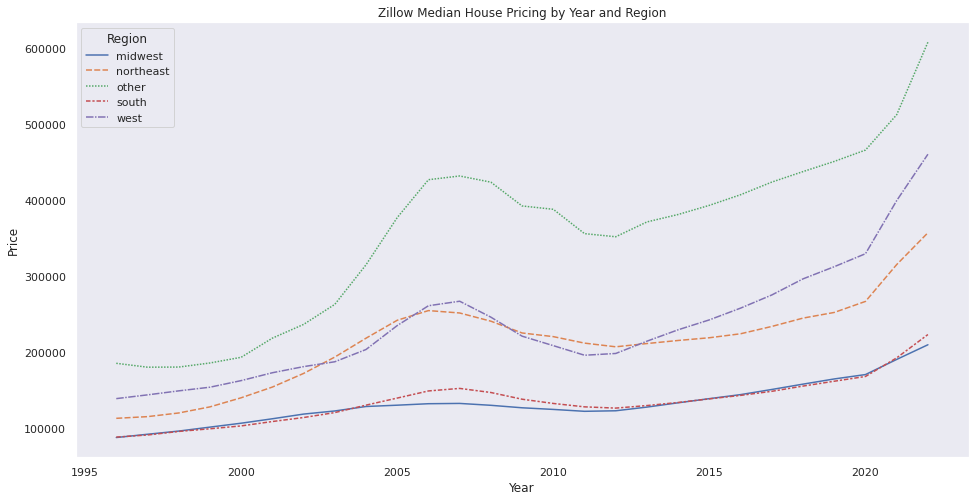

In [9]:
fig2, ax2 = plt.subplots(figsize=(16, 8))
sns.lineplot(data=region_prices, ax=ax2)
ax.legend(bbox_to_anchor = (1,1))
ax2.set_title('Zillow Median House Pricing by Year and Region')
ax2.set_ylabel('Price')

Text(0, 0.5, 'Price')

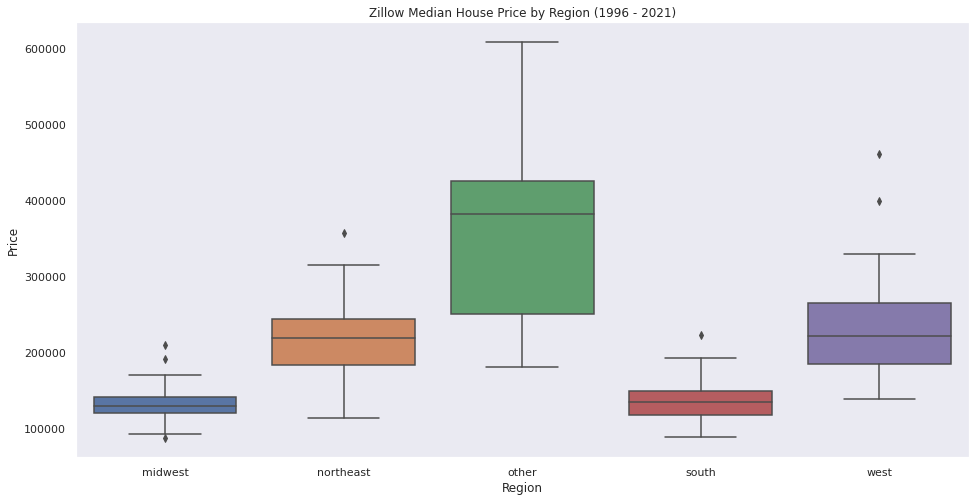

In [10]:
fig3, ax3 = plt.subplots(figsize=(16,8))
sns.boxplot(data=region_prices, ax=ax3)
ax3.set_title("Zillow Median House Price by Region (1996 - 2021)")
ax3.set_ylabel("Price")

# US Census Median Household Income Cleaning

In [11]:
household_income.head(10)

,Table with row headers in column A and column headers in rows 8 through 9 and 63 through 64,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,...,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,Unnamed: 64,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78,Unnamed: 79,Unnamed: 80
0,Table H-8. Median Household Income by State: 1...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"Information on confidentiality protection, sam...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Footnotes are available at <www.census.gov/top...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Source: U.S. Census Bureau, Current Population...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,(Households as of March of the following year....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Current Dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,State,2021,NaN,2020 (41),NaN,2019,NaN,2018,NaN,2017 (40),NaN,2017,NaN,2016,NaN,2015,NaN,2014,NaN,2013 (39),NaN,2013 (38),NaN,2012,NaN,...,NaN,1995 (25),NaN,1994 (24),NaN,1993 (23),NaN,1992 (22),NaN,1991,NaN,1990,NaN,1989,NaN,1988,NaN,1987 (21),NaN,1986,NaN,1985 (20),NaN,1984 (19),NaN
7,NaN,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,...,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error,Median income,Standard error
8,United States,"70,784",368,"68,010",535,"68,703",550,"63,179",420,"61,136",322,"61,372",335,"59,039",436,"56,516",321,"53,657",392,"53,585",654,"51,939",276,"51,017",209,...,179,"34,076",197,"32,264",147,"31,241",146,"30,636",145,"30,126",144,"29,943",153,"28,906",159,"27,225",139,"26,061",127,"24,897",129,"23,618",128,"22,415",102
9,Alabama,"56,929","2,294","54,689","2,563","56,200","2,512","49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509","3,419","42,278","1,529","47,320","5,511","41,381","2,315","43,464","2,529",...,"1,258","25,991","1,266","27,196","1,559","25,082","1,088","25,808","1,058","24,346","1,068","23,357","1,037","21,284","1,070","19,948",912,"19,734","1,147","19,132",885,"18,333",760,"17,310",605


In [12]:
# Set column header names
houseIncome_header = household_income.iloc[6]
household_income.columns = houseIncome_header
# Drop columns without data (drop header information)
household_income = household_income.iloc[8:]
household_income.reset_index(inplace=True, drop=True)

household_income.head()

6,State,2021,NaN,2020 (41),NaN,2019,NaN,2018,NaN,2017 (40),NaN,2017,NaN,2016,NaN,2015,NaN,2014,NaN,2013 (39),NaN,2013 (38),NaN,2012,NaN,...,NaN,1995 (25),NaN,1994 (24),NaN,1993 (23),NaN,1992 (22),NaN,1991,NaN,1990,NaN,1989,NaN,1988,NaN,1987 (21),NaN,1986,NaN,1985 (20),NaN,1984 (19),NaN
0,United States,"70,784",368,"68,010",535,"68,703",550,"63,179",420,"61,136",322,"61,372",335,"59,039",436,"56,516",321,"53,657",392,"53,585",654,"51,939",276,"51,017",209,...,179,"34,076",197,"32,264",147,"31,241",146,"30,636",145,"30,126",144,"29,943",153,"28,906",159,"27,225",139,"26,061",127,"24,897",129,"23,618",128,"22,415",102
1,Alabama,"56,929","2,294","54,689","2,563","56,200","2,512","49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509","3,419","42,278","1,529","47,320","5,511","41,381","2,315","43,464","2,529",...,"1,258","25,991","1,266","27,196","1,559","25,082","1,088","25,808","1,058","24,346","1,068","23,357","1,037","21,284","1,070","19,948",912,"19,734","1,147","19,132",885,"18,333",760,"17,310",605
2,Alaska,"81,133","3,967","74,746","3,557","78,394","6,685","68,734","3,390","77,987","3,718","72,231","2,719","75,723","4,086","75,112","3,485","67,629","3,153","72,472","5,446","61,137","3,301","63,648","2,839",...,"1,907","47,954","2,008","45,367","1,494","42,931","1,643","41,802","1,156","40,612","1,822","39,298","1,627","36,006","1,378","33,103","1,183","33,233","1,497","31,356","1,017","34,782","1,089","32,356","1,473"
3,Arizona,"70,821","3,394","67,088","3,409","70,674","3,391","62,283","2,291","59,700","2,689","61,125","2,642","57,100","1,971","52,248","2,008","49,254","2,304","52,611","4,365","50,602","4,831","47,044","2,922",...,"1,274","30,863","1,360","31,293",773,"30,510","1,120","29,358","1,088","30,737",897,"29,224","1,141","28,552","1,210","26,435",843,"26,749",892,"25,500",718,"23,877",744,"21,425",609
4,Arkansas,"50,784","1,440","50,777","1,837","54,539","2,384","49,781","2,108","49,751","2,491","48,829","2,642","45,907","2,165","42,798","1,572","44,922","2,546","39,376","2,402","39,919","2,389","39,018","2,812",...,978,"25,814",999,"25,565",944,"23,039",847,"23,882","1,398","23,435",783,"22,786",981,"21,433",915,"20,172",706,"18,827","1,008","18,730",765,"17,451",764,"15,674",748


In [13]:
# Drop the NaN columns (previous known as standard error)
household_income = household_income.loc[:, household_income.columns.notna()]
# Drop United States row
household_income = household_income.iloc[1:]
household_income.reset_index(inplace=True, drop=True)

household_income.head()

6,State,2021,2020 (41),2019,2018,2017 (40),2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),2008,2007,2006,2005,2004 (revised),2003,2002,2001,2000 (30),1999 (29),1998,1997,1996,1995 (25),1994 (24),1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
0,Alabama,"56,929","54,689","56,200","49,936","50,865","51,113","47,221","44,509","42,278","47,320","41,381","43,464","42,590","40,933","39,980","44,476","42,212","37,952","37,150","36,629","37,255","37,603","35,160","35,424","36,251","36,266","31,939","30,302","25,991","27,196","25,082","25,808","24,346","23,357","21,284","19,948","19,734","19,132","18,333","17,310"
1,Alaska,"81,133","74,746","78,394","68,734","77,987","72,231","75,723","75,112","67,629","72,472","61,137","63,648","57,431","57,848","61,604","63,989","62,993","56,418","55,891","55,063","51,837","52,774","57,363","52,847","51,396","50,692","47,994","52,779","47,954","45,367","42,931","41,802","40,612","39,298","36,006","33,103","33,233","31,356","34,782","32,356"
2,Arizona,"70,821","67,088","70,674","62,283","59,700","61,125","57,100","52,248","49,254","52,611","50,602","47,044","48,621","46,896","45,739","46,914","47,215","46,657","45,245","43,846","41,166","39,734","42,704","39,783","36,995","37,090","32,740","31,637","30,863","31,293","30,510","29,358","30,737","29,224","28,552","26,435","26,749","25,500","23,877","21,425"
3,Arkansas,"50,784","50,777","54,539","49,781","49,751","48,829","45,907","42,798","44,922","39,376","39,919","39,018","41,302","38,587","36,538","39,586","40,795","37,057","36,658","34,984","32,002","32,387","33,339","29,697","29,682","27,665","26,162","27,123","25,814","25,565","23,039","23,882","23,435","22,786","21,433","20,172","18,827","18,730","17,451","15,674"
4,California,"81,575","77,652","78,105","70,489","70,038","69,759","66,637","63,636","60,487","60,794","57,528","57,020","53,367","54,283","56,134","57,014","55,734","55,319","51,755","49,222","49,300","47,437","47,262","46,816","43,629","40,934","39,694","38,812","37,009","35,331","34,073","34,903","33,664","33,290","33,009","30,287","30,146","29,010","26,981","25,287"


In [14]:
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

In [15]:
# replace state name to state abbreviation
household_income['State'] = household_income['State'].map(lambda x: us_state_to_abbrev.get(x, x))

household_income.loc[50:56]

6,State,2021,2020 (41),2019,2018,2017 (40),2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),2008,2007,2006,2005,2004 (revised),2003,2002,2001,2000 (30),1999 (29),1998,1997,1996,1995 (25),1994 (24),1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
50,WY,"71,052","65,450","65,134","62,539","59,536","57,837","57,829","60,925","55,690","67,441","55,700","57,512","54,509","52,201","52,470","53,337","48,744","47,041","44,718","45,397","42,555","39,763","39,719","39,629","37,248","35,250","33,423","30,953","31,529","33,140","29,442","30,209","29,050","29,460","29,521","26,419","27,590","23,559","22,081","23,816"
51,2021 Dollars,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,State,2021,2020 (41),2019,2018,2017 (40),2017,2016,2015,2014,2013 (39),2013 (38),2012,2011,2010 (37),2009 (36),2008,2007,2006,2005,2004 (revised),2003,2002,2001,2000 (30),1999 (29),1998,1997,1996,1995 (25),1994 (24),1993 (23),1992 (22),1991,1990,1989,1988,1987 (21),1986,1985 (20),1984 (19)
53,NaN,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income,Median income
54,United States,"70,784","71,186","72,808","68,168","67,571","67,832","66,657","64,631","61,468","62,425","60,507","60,313","60,428","61,364","63,011","63,455","65,801","64,930","64,427","63,745","63,967","64,047","64,779","66,248","66,385","64,781","62,484","61,225","60,348","58,515","57,843","58,153","58,607","60,370","61,153","60,115","59,624","58,920","56,871","55,828"
55,AL,"56,929","57,243","59,558","53,879","56,219","56,493","53,314","50,900","48,432","55,126","48,207","51,384","51,417","50,975","50,609","56,105","55,294","51,124","51,666","52,667","55,014","56,789","53,936","55,888","59,134","60,418","53,930","52,272","46,029","49,324","46,440","48,989","47,363","47,092","45,028","44,047","45,148","45,277","44,145","43,113"
56,AK,"81,133","78,236","83,079","74,161","86,196","79,834","85,494","85,898","77,473","84,427","71,222","75,246","69,334","72,039","77,982","80,720","82,515","75,999","77,729","79,172","76,547","79,700","87,996","83,377","83,839","84,451","81,039","91,045","84,925","82,279","79,487","79,348","79,006","79,231","76,174","73,094","76,032","74,205","83,754","80,587"


In [16]:
# remove header information in middle of file
household_income = household_income.drop([51,52,53,54])
household_income.reset_index(inplace=True, drop=True)

# set state col as the index
household_income = household_income.set_index('State')

# clean up extra text at the end of some years
household_income.columns = household_income.columns.str[:4]

# remove comma in all rows
# convert to float type
household_income = household_income.replace(',','', regex=True)
household_income = household_income.astype(float)

# group data by state
household_income = household_income.groupby(['State']).mean()

# swap year and state axes
household_income = household_income.swapaxes(axis1=0, axis2=1, copy=True)
# set year as the index
household_income.index.name = 'Year'
# group data by year
household_income = household_income.groupby(['Year']).mean()

household_income.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,...,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1984,56471.5,30211.5,27356.0,37393.5,44134.0,45031.0,52274.0,35618.5,45062.5,34531.0,34878.5,50399.5,34667.5,36812.5,41455.0,39741.0,42985.5,30857.0,33072.0,47052.0,51850.0,36037.5,40081.0,42648.5,36259.0,...,34096.5,35899.5,36252.0,37344.5,45228.0,48478.0,36006.0,44987.5,38444.0,40357.0,36910.0,37348.0,35510.0,37720.0,35445.5,33875.0,29290.0,40184.0,40242.0,46294.5,39406.0,43662.5,36203.0,29396.5,41566.5
1985,59268.0,31239.0,29736.0,40686.0,45975.0,48021.5,52977.0,35913.0,39157.5,36368.0,35867.0,49349.0,35659.5,35376.5,42378.0,38638.0,38830.5,29583.0,36088.5,48064.5,51351.0,34964.0,41308.0,40650.0,37383.5,...,34482.0,36552.0,36133.0,37145.0,44990.5,52789.5,34800.5,39658.5,40280.5,42896.0,36133.0,37307.0,38982.0,41960.5,34141.0,30913.5,30293.5,40457.5,43005.0,48442.5,44303.5,40895.5,39611.0,27235.0,37625.5
1986,52780.5,32204.5,31527.5,42923.5,48832.0,45771.5,55078.5,40940.5,43135.5,38461.0,41021.5,48820.0,37804.5,34926.5,44625.5,38257.5,40274.0,33453.5,35163.5,51069.0,51515.0,39429.0,44783.5,44511.0,36906.0,...,34217.5,36798.0,36204.0,36648.0,51420.5,53385.0,33404.5,44130.5,42124.0,42275.5,35261.0,41699.5,40073.5,44674.0,36978.0,33494.0,30730.0,40671.5,44238.0,50018.5,41407.0,45248.0,44489.0,27713.5,39656.5
1987,54632.5,32441.0,30950.0,43973.5,49557.5,43524.5,54022.5,45134.0,48075.0,40258.0,43915.5,57573.5,36478.5,34119.5,44524.0,37019.5,42056.5,33985.0,35096.0,53001.5,57488.0,38796.5,45540.0,46164.5,38994.0,...,33657.5,37415.5,37113.0,38251.0,53161.0,56289.5,34124.5,44185.5,43373.0,42369.0,35658.5,41160.5,41795.0,46510.0,41178.5,34770.5,34816.5,40639.5,43611.5,49311.0,41780.5,44910.5,43348.5,28287.0,45356.0
1988,53098.5,31997.5,32356.5,42403.0,48581.5,42048.5,58087.0,42893.5,48931.0,40752.0,42613.0,52972.0,38986.0,37614.5,47357.5,42175.0,41009.0,31931.5,32878.0,53275.0,58631.0,42350.0,47274.5,46656.5,37603.5,...,35659.5,39162.5,38644.5,40356.0,55540.0,58206.0,30951.5,44886.0,46381.0,44496.0,37963.0,44509.0,42895.0,47868.0,40956.0,35760.5,33454.0,40041.5,42207.0,52368.5,46498.0,51854.0,47439.5,31043.0,42377.0


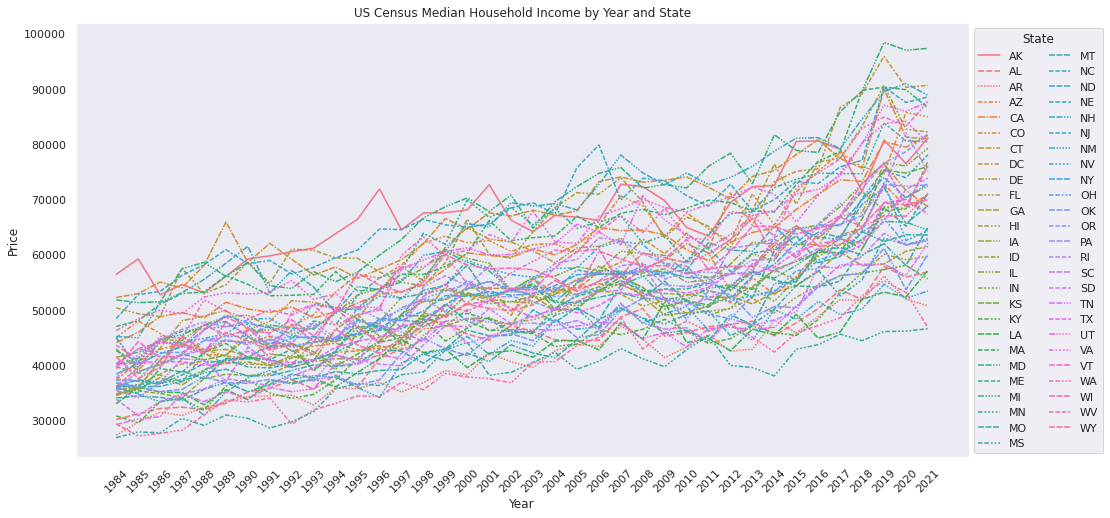

In [17]:
fig4, ax4 = plt.subplots(figsize=(16, 8))
sns.lineplot(data=household_income, ax=ax4)
ax4.legend(title='State', bbox_to_anchor = (1,1), ncol=2)
ax4.set_title('US Census Median Household Income by Year and State')
ax4.set_ylabel('Price')
ax4.tick_params(axis='x', rotation=45)

In [18]:
# drop data before 1996
household_income = household_income[12:]
household_income.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,...,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,71912.0,41287.0,36955.5,43106.0,52882.0,55795.0,57388.0,43554.0,53559.0,41749.0,44276.5,56915.0,45248.0,47291.5,53893.0,47888.5,44397.5,44163.0,41232.5,53811.0,59941.0,47274.0,53444.5,55851.0,46686.5,...,39082.5,48507.0,42878.5,46344.5,53692.5,64676.0,34180.0,52511.5,48246.5,46421.0,37383.5,48358.5,47550.5,50394.0,47231.5,40229.5,41952.0,45061.0,50465.0,53425.5,44088.5,49971.5,54502.0,34399.5,42174.0
1997,64516.5,42934.5,35168.5,44011.5,53359.5,58116.5,59127.5,42828.5,57848.0,43628.0,49285.0,55026.0,45413.5,44904.0,55495.5,52277.0,49026.5,44968.5,44710.5,56490.0,62757.0,44054.5,52079.5,57217.5,49137.0,...,39268.5,48178.5,42561.0,46635.5,55112.0,64553.0,40443.5,52230.0,48122.0,48573.5,42144.0,50070.0,50433.0,46776.5,46057.0,39916.5,41183.0,47150.0,57501.0,57745.5,47120.5,59903.0,53226.0,36951.0,44929.5
1998,67571.5,48342.0,36877.0,49440.5,54564.5,62116.0,61994.5,44565.5,55263.0,46533.0,51540.0,54422.0,49346.0,48894.0,57555.5,52961.0,48935.0,48323.5,42302.5,56445.5,66670.5,47507.5,55747.0,63884.5,53587.5,...,42091.5,47771.5,40395.0,48538.0,59928.5,66417.5,42046.5,52994.0,49845.5,51886.5,44957.5,52075.5,52006.5,54234.0,44344.5,43703.5,45443.0,47698.0,59050.0,57790.0,52482.5,63211.5,55088.5,35596.0,46987.5
1999,67617.5,47692.5,39050.0,48671.5,57399.0,63382.5,66561.0,50875.0,61344.5,47140.0,51868.0,58550.0,54069.0,47099.0,60952.5,53727.0,49135.5,44386.5,42960.0,57893.5,68682.0,51127.5,60635.5,61884.0,54444.0,...,40834.0,49012.0,42972.0,50817.0,60591.0,65431.0,42855.0,54547.0,52610.0,51952.5,42998.5,53439.0,49675.0,56202.0,47970.0,47136.0,48049.0,50898.5,60584.0,60114.5,54708.5,59825.0,60080.5,38543.5,49004.0
2000,68112.0,45656.0,38275.0,51274.5,60339.0,62174.0,64664.0,53129.0,64913.0,50079.5,54004.0,66435.0,52831.0,48475.0,59369.5,52669.0,52919.0,46740.0,39591.0,60257.5,70287.5,48030.5,58658.0,69921.5,58123.0,...,42244.5,49385.0,46393.5,53809.5,65636.0,64964.5,45229.5,58975.0,52513.0,55371.5,41800.0,54775.0,54358.5,54385.5,48422.0,47011.0,43944.5,49761.0,61285.0,60786.0,51030.5,54808.5,58111.5,37906.5,51076.0


In [19]:
region_idx = []

for s in household_income.columns:
    if s in west:
        region_idx.append('west')
    elif s in midwest:
        region_idx.append('midwest')
    elif s in south:
        region_idx.append('south')
    elif s in northeast:
        region_idx.append('northeast')
    else:
        region_idx.append('other')


household_income.columns = [household_income.columns, region_idx]
household_income.columns = household_income.columns.rename('Region',level=1)

region_income = household_income.groupby(level=1, axis=1).mean()

In [20]:
household_income.head()

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,HI,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,...,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Region,other,south,south,west,west,west,northeast,northeast,south,south,south,other,midwest,west,midwest,midwest,midwest,south,south,northeast,south,northeast,midwest,midwest,midwest,...,west,south,midwest,midwest,northeast,northeast,west,west,northeast,midwest,south,west,northeast,northeast,south,midwest,south,south,west,south,northeast,west,midwest,south,west
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996,71912.0,41287.0,36955.5,43106.0,52882.0,55795.0,57388.0,43554.0,53559.0,41749.0,44276.5,56915.0,45248.0,47291.5,53893.0,47888.5,44397.5,44163.0,41232.5,53811.0,59941.0,47274.0,53444.5,55851.0,46686.5,...,39082.5,48507.0,42878.5,46344.5,53692.5,64676.0,34180.0,52511.5,48246.5,46421.0,37383.5,48358.5,47550.5,50394.0,47231.5,40229.5,41952.0,45061.0,50465.0,53425.5,44088.5,49971.5,54502.0,34399.5,42174.0
1997,64516.5,42934.5,35168.5,44011.5,53359.5,58116.5,59127.5,42828.5,57848.0,43628.0,49285.0,55026.0,45413.5,44904.0,55495.5,52277.0,49026.5,44968.5,44710.5,56490.0,62757.0,44054.5,52079.5,57217.5,49137.0,...,39268.5,48178.5,42561.0,46635.5,55112.0,64553.0,40443.5,52230.0,48122.0,48573.5,42144.0,50070.0,50433.0,46776.5,46057.0,39916.5,41183.0,47150.0,57501.0,57745.5,47120.5,59903.0,53226.0,36951.0,44929.5
1998,67571.5,48342.0,36877.0,49440.5,54564.5,62116.0,61994.5,44565.5,55263.0,46533.0,51540.0,54422.0,49346.0,48894.0,57555.5,52961.0,48935.0,48323.5,42302.5,56445.5,66670.5,47507.5,55747.0,63884.5,53587.5,...,42091.5,47771.5,40395.0,48538.0,59928.5,66417.5,42046.5,52994.0,49845.5,51886.5,44957.5,52075.5,52006.5,54234.0,44344.5,43703.5,45443.0,47698.0,59050.0,57790.0,52482.5,63211.5,55088.5,35596.0,46987.5
1999,67617.5,47692.5,39050.0,48671.5,57399.0,63382.5,66561.0,50875.0,61344.5,47140.0,51868.0,58550.0,54069.0,47099.0,60952.5,53727.0,49135.5,44386.5,42960.0,57893.5,68682.0,51127.5,60635.5,61884.0,54444.0,...,40834.0,49012.0,42972.0,50817.0,60591.0,65431.0,42855.0,54547.0,52610.0,51952.5,42998.5,53439.0,49675.0,56202.0,47970.0,47136.0,48049.0,50898.5,60584.0,60114.5,54708.5,59825.0,60080.5,38543.5,49004.0
2000,68112.0,45656.0,38275.0,51274.5,60339.0,62174.0,64664.0,53129.0,64913.0,50079.5,54004.0,66435.0,52831.0,48475.0,59369.5,52669.0,52919.0,46740.0,39591.0,60257.5,70287.5,48030.5,58658.0,69921.5,58123.0,...,42244.5,49385.0,46393.5,53809.5,65636.0,64964.5,45229.5,58975.0,52513.0,55371.5,41800.0,54775.0,54358.5,54385.5,48422.0,47011.0,43944.5,49761.0,61285.0,60786.0,51030.5,54808.5,58111.5,37906.5,51076.0


In [21]:
region_income.head()

Region,midwest,northeast,other,south,west
Year,,,,,
1996,48148.708333,51067.50,64413.50,44216.96875,46892.500000
1997,49296.583333,51461.75,59771.25,46188.68750,49521.545455
1998,51802.333333,54542.75,60996.75,47391.78125,52133.772727
1999,53983.791667,56567.45,63083.75,48964.87500,52512.727273
2000,55432.333333,56896.90,67273.50,49109.81250,53696.000000


Text(0, 0.5, 'Price')

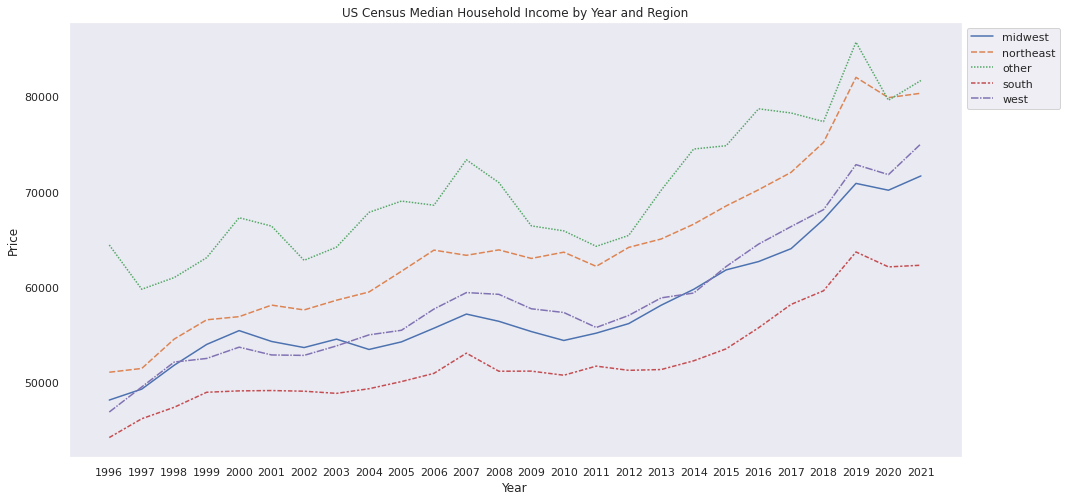

In [22]:
fig5, ax5 = plt.subplots(figsize=(16, 8))
sns.lineplot(data=region_income, ax=ax5)
ax5.legend(bbox_to_anchor = (1,1))
ax5.set_title('US Census Median Household Income by Year and Region')
ax5.set_ylabel('Price')

Text(0, 0.5, 'Price')

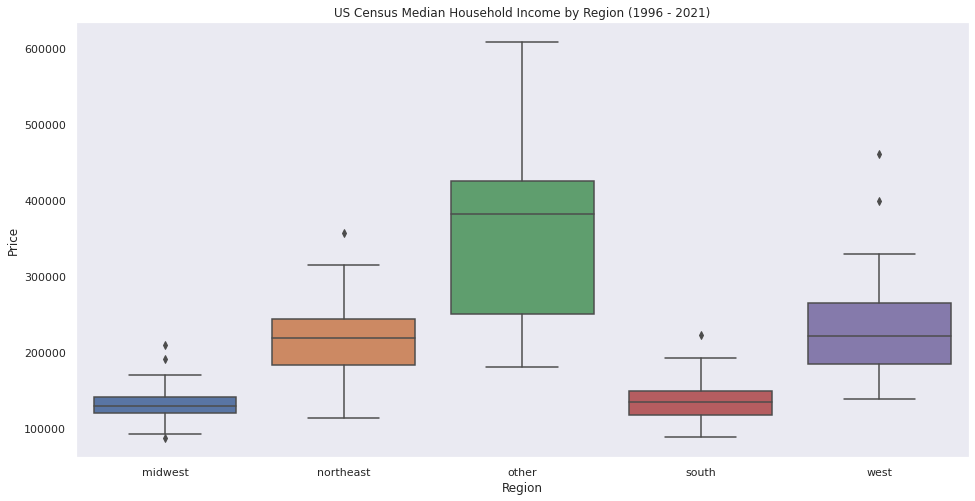

In [24]:
fig6, ax6 = plt.subplots(figsize=(16,8))
sns.boxplot(data=region_prices, ax=ax6)
ax6.set_title("US Census Median Household Income by Region (1996 - 2021)")
ax6.set_ylabel("Price")

# References
We report here relevant references:
1. author1, article1, journal1, year1, url1
2. author2, article2, journal2, year2, url2